In [1]:
### Numpy: Extend Vector by last non-zero element.

In [11]:
import numpy as np

a = np.array([0, 1, 0, 2, 99, 0, 0])
b = np.array([1, 2])
c = np.zeros(3)
a, b, c

(array([ 0,  1,  0,  2, 99,  0,  0]), array([1, 2]), array([0., 0., 0.]))

In [17]:
# find biggest index for a non-zero element 
np.nonzero(a)[0].max(), np.nonzero(b)[0].max(), np.nonzero(c)

(4, 1, (array([], dtype=int64),))

In [20]:
def fill_with_last_nonzero_value(x: np.ndarray):
    """ Return a vector which consists of a copy of x but with all trailing zeros
        overwritten by with the last non-zero element in the vector."""
    y = x.copy()
    nz = np.nonzero(y)[0]
    if len(nz) > 0:
        y[nz.max()+1:] = y[nz.max()]
    return y

In [21]:
fill_with_last_nonzero_value(a), fill_with_last_nonzero_value(b), fill_with_last_nonzero_value(c)

(array([ 0,  1,  0,  2, 99, 99, 99]), array([1, 2]), array([0., 0., 0.]))

### Numpy broadcasting

In [2]:
import numpy as np

In [6]:
num_states, num_records = 2, 5
cf_eom_per_state_change = np.arange(num_states * num_states * num_records).reshape((num_states, num_states, num_records))
cf_eom_per_state_change

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

Interpretation: The first row represents the payments due when transitioning form 0 to 0, the second when transitioning from 0 to 1, the third is the transition 1->0, the fourth is 1 -> 0

In [13]:
# conditional on being in status "0" at the EOP for all insureds the reserve must be 1 and
# conditional on being in status "1" it must be 2
last_year_reserves = np.array([
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
])
last_year_reserves


array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [14]:
cf_eom_per_state_change + last_year_reserves

array([[[ 1,  2,  3,  4,  5],
        [ 7,  8,  9, 10, 11]],

       [[11, 12, 13, 14, 15],
        [17, 18, 19, 20, 21]]])

The broadcasting works as expected:

- first row: we see the sum of the payments due for 0->0 transitions + the reserve needed when in state 0 (1 higher than the payments)
- second row: we see the sum of the payments due for 0->1 transitions + the reserve needed when in state 1 (2 higher than the payments)
- same for rwos three an four



In [16]:
# test sum
cf_eom_per_state_change, cf_eom_per_state_change.sum(axis=2)

(array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],
 
        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]]),
 array([[10, 35],
        [60, 85]]))

In [50]:
from enum import IntEnum
import numpy as np

In [54]:
A = np.array([[1, 2], [3, 4]])
A, A.sum(axis=1)

(array([[1, 2],
        [3, 4]]),
 array([3, 7]))

In [ ]:
class States(IntEnum):
    ACTIVE = 0
    DIS1 = 1
    DIS2 = 2

In [ ]:
len(States)

In [ ]:
transition_matrix = np.array([
    [0.7, 0.1, 0.05, 0.05, 0.1],
    [0.2, 0.5, 0.2, 0.1, 0],
    [0, 0, 0.8, 0.2, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
])
transition_matrix

In [ ]:
state0 = np.array([[1, 0, 0, 0, 0], [0, 1, 0, 0, 0]])
state0

In [ ]:
state1 = np.dot(state0, transition_matrix)
state1

In [ ]:
state2 = np.dot(state1, transition_matrix)
state2

### Different transition matrices per row

In [7]:
t1 = np.array([
    [0.6, 0.4],
    [0, 1],
])

t2 = np.array([
    [0.5, 0.5],
    [0.1, 0.9],
])
t1, t2

(array([[0.6, 0.4],
        [0. , 1. ]]),
 array([[0.5, 0.5],
        [0.1, 0.9]]))

In [8]:
# create two mixed states
s = np.array([[0.6, 0.4], [0.1, 0.9]])
s

array([[0.6, 0.4],
       [0.1, 0.9]])

In [ ]:
# expected rows of the result
np.dot(s[0, :], t1),np.dot(s[1,:], t2)

In [ ]:
# build one matrix of transitions
T = np.zeros((2, 2, 2))
T[0, :, :] = t1
T[1, :, :] = t2
T

In [ ]:
# calculate state transition vectorized
np.einsum('ij,ijk->ik', s, T)

### Building the Transition Matrix

In [9]:
# start with base mortality table by age
qx = np.linspace(0, 1, 100)
len(qx), qx

(100,
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273

In [10]:

age_vec = np.array([42, 25, 67], dtype=int)
age_vec

array([42, 25, 67])

In [11]:
num_insured = len(age_vec)
num_insured

3

In [12]:
# generate the state transitions
T = np.zeros((num_insured, 2, 2))
T

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [13]:
# select mortalities per age
qx[age_vec]

array([0.42424242, 0.25252525, 0.67676768])

In [14]:
# build matrix of transition probabilities if alive
alive_transitions = qx[age_vec].reshape((num_insured, 1)).dot(np.array([-1, 1]).reshape((1, 2))) + np.ones((num_insured, 1)).dot(np.array([1, 0]).reshape((1, 2)))
alive_transitions

array([[0.57575758, 0.42424242],
       [0.74747475, 0.25252525],
       [0.32323232, 0.67676768]])

In [16]:
# death transition: who is dead stays it
death_transitions = np.ones((3, 1)).dot(np.array([0, 1]).reshape((1, 2)))
death_transitions

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
T[:, 0, :] = alive_transitions
T[:, 1, :] = death_transitions
T

array([[[0.57575758, 0.42424242],
        [0.        , 1.        ]],

       [[0.74747475, 0.25252525],
        [0.        , 1.        ]],

       [[0.32323232, 0.67676768],
        [0.        , 1.        ]]])

In [ ]:
state_old = np.ones((3, 1)).dot(np.array([1, 0]).reshape((1, 2)))
state_old

In [ ]:
# apply state transitions
state_new = np.einsum('ij,ijk->ik', state_old, T)
state_new

In [ ]:
# zum checken (vgl. mit zweiter Spalte oben)
qx[age_vec]

In [ ]:
# one more transition
np.einsum('ij,ijk->ik', state_new, T)

### Check reading in

In [57]:
from importlib import reload
reload(multistate)

<module 'multistate' from 'D:\\programming\\PyMulitState\\multistate.py'>

In [1]:
import math
import numpy as np
import pandas as pd
import multistate
projector = multistate.main()

INFO - 2022-06-07 14:03:03,359 - portfolio - Reading portfolio data from file data/portfolio/portfolio_med.xlsx.
INFO - 2022-06-07 14:03:08,020 - multistate - Portolio rows: 10000
INFO - 2022-06-07 14:03:08,021 - assumptions - Reading assumptions from file data/assumptions/base_assumption.xlsx
DEBUG - 2022-06-07 14:03:08,040 - assumptions - Sheet MORTALITY (0->3) describes the transition 0 => 3
DEBUG - 2022-06-07 14:03:08,041 - assumptions - Sheet LAPSE (0->4) describes the transition 0 => 4
DEBUG - 2022-06-07 14:03:08,042 - assumptions - Sheet DIS1 (0->1) describes the transition 0 => 1
DEBUG - 2022-06-07 14:03:08,042 - assumptions - Sheet DIS_WORSEN (1->2) describes the transition 1 => 2
DEBUG - 2022-06-07 14:03:08,043 - assumptions - Sheet DIS_DEATH1 (1->3) describes the transition 1 => 3
DEBUG - 2022-06-07 14:03:08,044 - assumptions - Sheet REC1(1->0) describes the transition 1 => 0
DEBUG - 2022-06-07 14:03:08,045 - assumptions - Sheet DIS2(0->2) describes the transition 0 => 2
DEB

DEBUG - 2022-06-07 14:03:20,085 - multistate - Calculating projection year 74.
INFO - 2022-06-07 14:03:20,193 - export - Exporting NCF to data/results/ncf_out.csv
INFO - 2022-06-07 14:03:20,232 - multistate - Elapsed time 16.873013019561768


In [3]:
projector.proj_state.state_recorder

array([[[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]],

       [[9.97628500e-01, 6.25000000e-04, 6.25000000e-04, 7.98333333e-05,
         1.04166667e-03],
        [9.96795833e-01, 1.04166667e-03, 1.04166667e-03, 7.91666667e-05,
         1.04166667e-03],
        [4.16666667e-03, 9.90625000e-01, 4.16666667e-03, 1.04166667e-03,
         0.00000000e+00]],

       [[9.95265358e-01, 1.24396052e-03, 1.24708552e-03, 1.62732550e-04,
         2.08086302e-03],
        [9.93606491e-01, 2.07240017e-03, 2.07760851e-03, 1.63505017e-04,
         2.07999566e-03],
        [8.28181563e-03, 9.81350911e-01, 8.27170139e-03, 2.09123125e-03,
         4.34027778e-06]],

       ...,

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.000000

In [4]:
projector.ncf_portfolio

array([[       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ],
       [   30560.83333333, -1388750.00000002,        0.        ,
               0.        ,        0.        ],
       [   32535.289886  , -1338304.96706194,   -46882.04177851,
               0.        ,        0.        ],
       ...,
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ]])

In [25]:
projector.proj_state.state_matrix

array([[5.98740812e-04, 2.98904270e-05, 6.80881124e-05, 5.80909277e-01,
        4.18394003e-01],
       [1.57126913e-04, 1.17073341e-05, 2.66689255e-05, 5.54222893e-01,
        4.45581604e-01],
       [2.21329121e-04, 1.32693857e-05, 3.02272052e-05, 7.58259335e-01,
        2.41475839e-01]])

### Payments


In [6]:
projector.ncf_portfolio
# projector.payments_recorder

array([[ 2.50000000e+01, -4.16666667e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.53908916e+01, -4.02180984e+02, -1.53744711e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 2.57535397e+01, -3.88309690e+02, -2.99190743e+01,
         0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.13615805e-09, -1.53689950e-07, -7.00203233e-07,
         0.00000000e+00,  0.00000000e+00],
       [ 4.06009945e-09, -1.50863791e-07, -6.87327401e-07,
         0.00000000e+00,  0.00000000e+00],
       [ 3.98543948e-09, -1.48089601e-07, -6.74688339e-07,
         0.00000000e+00,  0.00000000e+00]])

In [34]:
portfolio_date = projector.proj_state._portfolio.portfolio_date
portfolio_year, portfolio_month = portfolio_date.year, portfolio_date.month
portfolio_year, portfolio_month

(2021, 12)

In [47]:
# generate a time axis
len(projector.ncf_portfolio)
zero_based_months_tmp = (portfolio_month - 1) + np.arange(1, 1 + len(projector.ncf_portfolio))
months = zero_based_months_tmp % 12 + 1
months

array([ 8,  9, 10, ...,  5,  6,  7], dtype=int32)

In [48]:
years = portfolio_year + zero_based_months_tmp // 12
years

array([2021, 2021, 2021, ..., 2121, 2121, 2121], dtype=int32)

In [49]:
quarters = (months - 1) // 3 + 1
quarters[:10]

array([3, 3, 4, 4, 4, 1, 1, 1, 2, 2], dtype=int32)

In [28]:
df_ncf = pd.DataFrame({
    "PREMIUM": projector.ncf_portfolio[:, 0],
    "DI_ONG_CLAIMS1": projector.ncf_portfolio[:, 1],
    "DI_ONG_CLAIMS2": projector.ncf_portfolio[:, 2]
})
df_ncf

,PREMIUM,DI_ONG_CLAIMS1,DI_ONG_CLAIMS2
0,9.166667,-416.666667,0.000000
1,9.759086,-401.531582,-14.065895
2,10.319578,-387.037787,-27.330817
3,10.849565,-373.157034,-39.833448
4,11.350385,-359.862329,-51.610678
...,...,...,...
595,0.017231,-0.008907,-0.040578
596,0.016609,-0.008743,-0.039832
597,0.016010,-0.008582,-0.039099
598,0.015433,-0.008424,-0.038380


DEBUG - 2022-06-06 18:50:51,530 - matplotlib - (private) matplotlib data path: D:\Software\miniconda\lib\site-packages\matplotlib\mpl-data
DEBUG - 2022-06-06 18:50:51,531 - matplotlib - matplotlib data path: D:\Software\miniconda\lib\site-packages\matplotlib\mpl-data
DEBUG - 2022-06-06 18:50:51,558 - matplotlib - CONFIGDIR=C:\Users\martin\.matplotlib
DEBUG - 2022-06-06 18:50:51,564 - matplotlib - matplotlib version 3.3.4
DEBUG - 2022-06-06 18:50:51,564 - matplotlib - interactive is False
DEBUG - 2022-06-06 18:50:51,565 - matplotlib - platform is win32
DEBUG - 2022-06-06 18:50:51,568 - matplotlib - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'nt', '_thread', '_weakref', 'winreg', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath'

DEBUG - 2022-06-06 18:50:51,856 - matplotlib - CACHEDIR=C:\Users\martin\.matplotlib
DEBUG - 2022-06-06 18:50:51,867 - matplotlib.font_manager - Using fontManager instance from C:\Users\martin\.matplotlib\fontlist-v330.json
DEBUG - 2022-06-06 18:50:52,517 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG - 2022-06-06 18:50:52,519 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.


<AxesSubplot:>

DEBUG - 2022-06-06 18:50:52,735 - matplotlib.font_manager - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG - 2022-06-06 18:50:52,737 - matplotlib.font_manager - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,738 - matplotlib.font_manager - findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,739 - matplotlib.font_manager - findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,741 - matplotlib.font_manager - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,742 - matplotlib.font_manager - findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,743 - matplotlib.font_ma

DEBUG - 2022-06-06 18:50:52,787 - matplotlib.font_manager - findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,788 - matplotlib.font_manager - findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,789 - matplotlib.font_manager - findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,794 - matplotlib.font_manager - findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,794 - matplotlib.font_manager - findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,795 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
DEBUG - 2022-06-06 18:50:52,795 - matplotlib.font_manager - findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 

DEBUG - 2022-06-06 18:50:52,827 - matplotlib.font_manager - findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,828 - matplotlib.font_manager - findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,830 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,830 - matplotlib.font_manager - findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,830 - matplotlib.font_manager - findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,831 - matplotlib.font_manager - findfont: score(<Font 'Cambria' (cambriab.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,831 - matplotlib.font_manager - findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal

DEBUG - 2022-06-06 18:50:52,862 - matplotlib.font_manager - findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 6.413636363636363
DEBUG - 2022-06-06 18:50:52,862 - matplotlib.font_manager - findfont: score(<Font 'Segoe WP' (SegoeWP-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,863 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
DEBUG - 2022-06-06 18:50:52,863 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
DEBUG - 2022-06-06 18:50:52,864 - matplotlib.font_manager - findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,864 - matplotlib.font_manager - findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,864 - matplotlib.font_manager - findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 

DEBUG - 2022-06-06 18:50:52,897 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,897 - matplotlib.font_manager - findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,898 - matplotlib.font_manager - findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,898 - matplotlib.font_manager - findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,899 - matplotlib.font_manager - findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,899 - matplotlib.font_manager - findfont: score(<Font 'Segoe WP' (SegoeWP-Semibold.ttf) normal normal 600 normal>) = 10.24
DEBUG - 2022-06-06 18:50:52,900 - matplotlib.font_manager - findfont: score(<Font 'Webdings' (webdings.ttf) nor

DEBUG - 2022-06-06 18:50:52,930 - matplotlib.font_manager - findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,930 - matplotlib.font_manager - findfont: score(<Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,931 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
DEBUG - 2022-06-06 18:50:52,932 - matplotlib.font_manager - findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
DEBUG - 2022-06-06 18:50:52,932 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG - 2022-06-06 18:50:52,933 - matplotlib.font_manager - findfont: score(<Font 'Segoe WP' (SegoeWP-Semibold.ttf) normal normal 600 normal>) = 10.24
DEBUG - 2022-06-06 18:50:52,934 - matplotlib.font_manager - findfont: score(<Font 'Consolas' (consolab.ttf) normal norm

DEBUG - 2022-06-06 18:50:52,964 - matplotlib.font_manager - findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,965 - matplotlib.font_manager - findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,965 - matplotlib.font_manager - findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,966 - matplotlib.font_manager - findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,966 - matplotlib.font_manager - findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
DEBUG - 2022-06-06 18:50:52,966 - matplotlib.font_manager - findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.525
DEBUG - 2022-06-06 18:50:52,967 - matplotlib.font_manager - findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal

DEBUG - 2022-06-06 18:50:52,998 - matplotlib.font_manager - findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.335
DEBUG - 2022-06-06 18:50:52,998 - matplotlib.font_manager - findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,999 - matplotlib.font_manager - findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:52,999 - matplotlib.font_manager - findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:53,000 - matplotlib.font_manager - findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:53,001 - matplotlib.font_manager - findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
DEBUG - 2022-06-06 18:50:53,002 - matplotlib.font_manager - findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.0

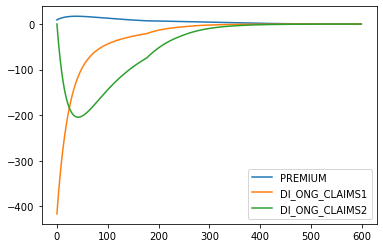

In [30]:
df_ncf.plot()

In [5]:
# The premium rate will be much more complicated and depend on
# the individual.
# Moreover, the payments can also depend on the individual (e.g. waiting periods),
# but it is not clear how that could be modelled in this framework (maybe a separate state?)

num_records = projector.proj_state.state_matrix.shape[0]
num_records

10000

In [6]:
payment_matrix = np.ones((num_records,1)).dot(Product.PAYMENT_MULITIPLIERS.reshape((1, 5)))
payment_matrix

array([[ 0.1, -1. , -2. ,  0. ,  0. ],
       [ 0.1, -1. , -2. ,  0. ,  0. ],
       [ 0.1, -1. , -2. ,  0. ,  0. ],
       ...,
       [ 0.1, -1. , -2. ,  0. ,  0. ],
       [ 0.1, -1. , -2. ,  0. ,  0. ],
       [ 0.1, -1. , -2. ,  0. ,  0. ]])

In [10]:
payments = projector.proj_state.state_matrix * payment_matrix * projector.sum_insured.reshape((num_records, 1))
payments

array([[   28.77612606,   -66.36432711,  -216.72353444,     0.        ,
            0.        ],
       [    2.87102138,    -6.63773803,   -21.71253067,     0.        ,
            0.        ],
       [  100.87448066,  -349.61421944, -1220.52348397,     0.        ,
            0.        ],
       ...,
       [    2.87102138,    -6.63773803,   -21.71253067,     0.        ,
            0.        ],
       [  100.87448066,  -349.61421944, -1220.52348397,     0.        ,
            0.        ],
       [   28.77612606,   -66.36432711,  -216.72353444,     0.        ,
            0.        ]])

In [12]:
payments.sum(axis=0)

array([  441723.36259622, -1408646.44083053, -4862928.90062833,
              0.        ,        0.        ])

In [2]:
projector.applicable_assumptions[1, :, :]

array([[       nan, 0.05      , 0.05      , 0.43697479, 0.05      ],
       [0.2       ,        nan, 0.2       , 0.05      , 0.        ],
       [0.01      , 0.1       ,        nan, 0.2       , 0.        ],
       [0.        , 0.        , 0.        ,        nan, 0.        ],
       [0.        , 0.        , 0.        , 0.        ,        nan]])

In [53]:
A = projector.applicable_assumptions.copy()
A

array([[[       nan, 0.03      , 0.03      , 0.39130435, 0.05      ],
        [0.2       ,        nan, 0.2       , 0.05      , 0.        ],
        [0.01      , 0.1       ,        nan, 0.2       , 0.        ],
        [0.        , 0.        , 0.        ,        nan, 0.        ],
        [0.        , 0.        , 0.        , 0.        ,        nan]],

       [[       nan, 0.05      , 0.05      , 0.43697479, 0.05      ],
        [0.2       ,        nan, 0.2       , 0.05      , 0.        ],
        [0.01      , 0.1       ,        nan, 0.2       , 0.        ],
        [0.        , 0.        , 0.        ,        nan, 0.        ],
        [0.        , 0.        , 0.        , 0.        ,        nan]],

       [[       nan, 0.05      , 0.05      , 0.42857143, 0.05      ],
        [0.2       ,        nan, 0.2       , 0.05      , 0.        ],
        [0.01      , 0.1       ,        nan, 0.2       , 0.        ],
        [0.        , 0.        , 0.        ,        nan, 0.        ],
        [0.     

In [4]:
# transform to quarters
timesteps_per_quarter = 2
timesteps_per_year = 4 * timesteps_per_quarter
timestep = 1.0 / timesteps_per_year
timestep

0.125

In [12]:
A_per_step = np.nan_to_num(A) * timestep
A_per_step

array([[[0.        , 0.00375   , 0.00375   , 0.04891304, 0.00625   ],
        [0.025     , 0.        , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.        , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.00625   , 0.00625   , 0.05462185, 0.00625   ],
        [0.025     , 0.        , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.        , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.00625   , 0.00625   , 0.05357143, 0.00625   ],
        [0.025     , 0.        , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.        , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.     

In [30]:
# first method would be to just fill per row so that the row sum becomes 1
row_sums = A_per_step.sum(axis=2)
row_sums

array([[0.06266304, 0.05625   , 0.03875   , 0.        , 0.        ],
       [0.07337185, 0.05625   , 0.03875   , 0.        , 0.        ],
       [0.07232143, 0.05625   , 0.03875   , 0.        , 0.        ]])

In [48]:
# idea to construct first index consisting of 5 zeros followed by 5 ones followed by 5 2's etc.
first_ind = np.arange(1, 4, dtype=np.int32).reshape((3, 1)).dot(np.ones((1,5), dtype=np.int32)).reshape(15) - 1
first_ind

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [47]:
# idea to construct second and third index consisting of the sequence 0, 1, 2, 3, 4 repeated for each insured
other_ind = np.ones((3,1), dtype=np.int32).dot(np.arange(1, 6, dtype=np.int32).reshape((1, 5))).reshape(15) - 1
other_ind

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [51]:
# adjust on the diagonal
A_per_step[first_ind, other_ind, other_ind] = 1 - row_sums.reshape(15)
A_per_step

array([[[0.93733696, 0.00375   , 0.00375   , 0.04891304, 0.00625   ],
        [0.025     , 0.94375   , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.96125   , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ]],

       [[0.92662815, 0.00625   , 0.00625   , 0.05462185, 0.00625   ],
        [0.025     , 0.94375   , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.96125   , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ]],

       [[0.92767857, 0.00625   , 0.00625   , 0.05357143, 0.00625   ],
        [0.025     , 0.94375   , 0.025     , 0.00625   , 0.        ],
        [0.00125   , 0.0125    , 0.96125   , 0.025     , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ],
        [0.     

In [52]:
# check: calculate the row sums again
A_per_step.sum(axis=2)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [17]:
# transform
B = 1 - A_per_step
B

array([[[1.        , 0.99625   , 0.99625   , 0.95108696, 0.99375   ],
        [0.975     , 1.        , 0.975     , 0.99375   , 1.        ],
        [0.99875   , 0.9875    , 1.        , 0.975     , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 0.99375   , 0.99375   , 0.94537815, 0.99375   ],
        [0.975     , 1.        , 0.975     , 0.99375   , 1.        ],
        [0.99875   , 0.9875    , 1.        , 0.975     , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ]],

       [[1.        , 0.99375   , 0.99375   , 0.94642857, 0.99375   ],
        [0.975     , 1.        , 0.975     , 0.99375   , 1.        ],
        [0.99875   , 0.9875    , 1.        , 0.975     , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.     

In [28]:
# the total decrements per insured and state at BOP
decrements = 1 - B.prod(axis=(2))
decrements

array([[0.06193262, 0.05531641, 0.03839102, 0.        , 0.        ],
       [0.07223713, 0.05531641, 0.03839102, 0.        , 0.        ],
       [0.07120629, 0.05531641, 0.03839102, 0.        , 0.        ]])

In [25]:
B[0, :, :]

array([[1.        , 0.99625   , 0.99625   , 0.95108696, 0.99375   ],
       [0.975     , 1.        , 0.975     , 0.99375   , 1.        ],
       [0.99875   , 0.9875    , 1.        , 0.975     , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [26]:
B[0, :, :].prod(axis=1)

array([0.93806738, 0.94468359, 0.96160898, 1.        , 1.        ])

In [27]:
0.99625 * 0.99625 * 0.95108696 * 0.99375  

0.9380673875699977